In [ ]:
from pandas import Series, DataFrame
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
df = pd.read_csv('Spotify.csv', encoding='latin_1')

In [ ]:
df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [ ]:
df.describe()

,Unnamed: 0,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,302.000000,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,174.215384,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,1.000000,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,151.500000,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,302.000000,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,452.500000,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,603.000000,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


In [ ]:
df.isna().sum() #check is there are NaN in the Data

Unnamed: 0    0
title         0
artist        0
top genre     0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64

In [ ]:
df.set_index('title')

df[['pop','title']].sort_values(by='pop', ascending=False)

,pop,title
572,99,Memories
573,97,Lose You To Love Me
574,96,Someone You Loved
575,95,Señorita
576,93,How Do You Sleep?
...,...,...
50,0,Hello
362,0,L.A.LOVE (la la)
442,0,Million Years Ago
138,0,Blow Me (One Last Kiss)


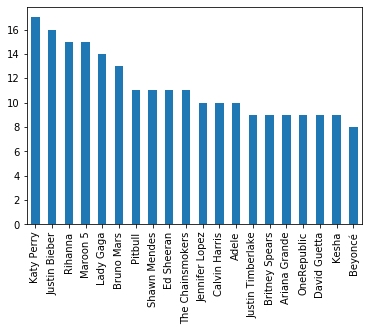

In [ ]:
all_art = df['artist'].value_counts()
all_art[:20].plot(kind='bar')

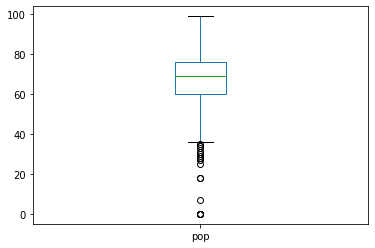

In [ ]:
df['pop'].plot(kind='box')

AxesSubplot(0.125,0.125;0.775x0.755)


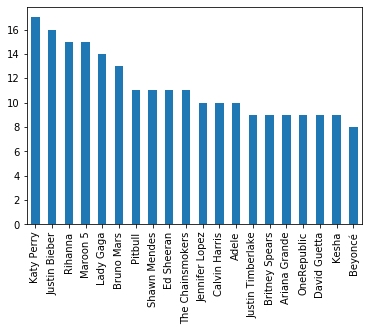

In [ ]:
#print(df['artist'].value_counts()[:10].plot(kind='pie'))






print(df['artist'].value_counts()[:20].plot(kind='bar'))


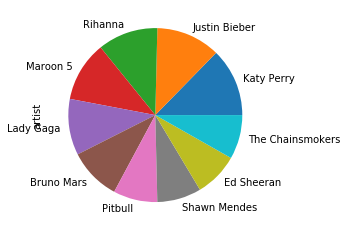

In [ ]:
all_art[:10].plot(kind='pie')

In [ ]:
df2 = df.groupby('title')['artist'].value_counts()
df2[:50]

title                                                      artist          
#Beautiful                                                 Mariah Carey        1
#SELFIE                                                    The Chainsmokers    1
#thatPOWER                                                 will.i.am           1
...Ready For It? - BloodPop® Remix                         Taylor Swift        1
1+1                                                        Beyoncé             1
24K Magic                                                  Bruno Mars          1
2U (feat. Justin Bieber)                                   David Guetta        1
3                                                          Britney Spears      1
43776                                                      Beyoncé             1
7 Years                                                    Lukas Graham        1
A L I E N S                                                Coldplay            1
A Little Party Never Killed Nobod

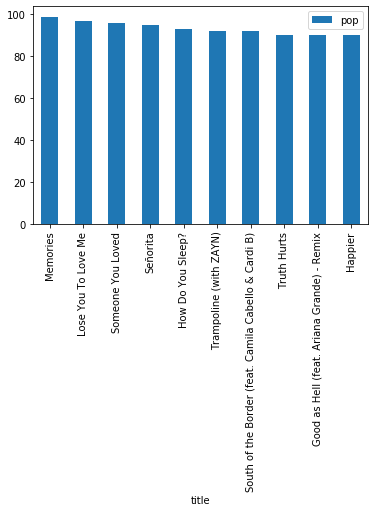

In [ ]:
df3 = df[['artist','pop','title']].sort_values(by='pop',ascending=False)[:100]
df3.set_index('title')[:10].plot(kind='bar')

In [ ]:
#df['top genre'].value_counts()

def all_pop(x):
    return x.split(' ')[-1]

all_pop('neo mellow')

df['All pop'] = df['top genre'].apply(lambda x: all_pop(x))
df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,All pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83,mellow
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82,hop
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80,pop
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79,pop
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78,pop


In [ ]:
all_pop_masked = df[df['All pop'] == 'pop']
all_pop_masked[:10]

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,All pop
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80,pop
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79,pop
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78,pop
5,6,Baby,Justin Bieber,canadian pop,2010,65,86,73,-5,11,54,214,4,14,77,pop
6,7,Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,4,82,203,0,9,77,pop
7,8,Secrets,OneRepublic,dance pop,2010,148,76,52,-6,12,38,225,7,4,77,pop
8,9,Empire State of Mind (Part II) Broken Down,Alicia Keys,hip pop,2010,93,37,48,-8,12,14,216,74,3,76,pop
9,10,Only Girl (In The World),Rihanna,barbadian pop,2010,126,72,79,-4,7,61,235,13,4,73,pop
10,11,Club Can't Handle Me (feat. David Guetta),Flo Rida,dance pop,2010,128,87,62,-4,6,47,235,3,3,73,pop
11,12,Marry You,Bruno Mars,pop,2010,145,83,62,-5,10,48,230,33,4,73,pop


In [ ]:
len(all_pop_masked)

469

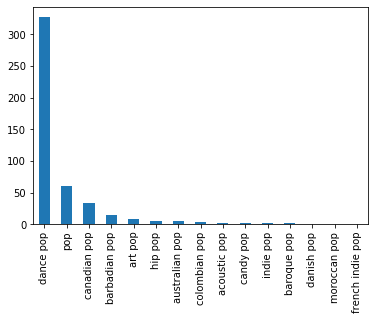

In [ ]:
all_pop_masked[['top genre','All pop']][:20]

all_pop_masked['top genre'].value_counts().plot(kind='bar')

In [ ]:
all_pop_masked[['top genre','All pop']]['top genre'].value_counts()


dance pop           327
pop                  60
canadian pop         34
barbadian pop        15
art pop               8
hip pop               6
australian pop        5
colombian pop         3
acoustic pop          2
candy pop             2
indie pop             2
baroque pop           2
danish pop            1
moroccan pop          1
french indie pop      1
Name: top genre, dtype: int64